[View in Colaboratory](https://colab.research.google.com/github/Bing5154/Summer18/blob/master/MNIST_NN.ipynb)

# Outline

Here we will train a fully-connected network to classify hand-written digits from images using the MNIST dataset

The network will take 28x28 pixel images and map them to digit categories {0, 1, 2, ..., 9}. 

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
accelerator = 'cu90' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Load the Dataset (MNIST)


We can use some PyTorch DataLoader utilities for this.  

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                   ])),
    batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                   ])),
    batch_size=1000, shuffle=True)


Processing...
Done!


# Display some images

In [8]:
from google.colab import files
uploaded = files.upload() # then browse, select the files. It's then uploaded
# choose plot_conf.py

Saving plot_conf.py to plot_conf.py


In [0]:
%run ~/plot_conf.py
plt_style()

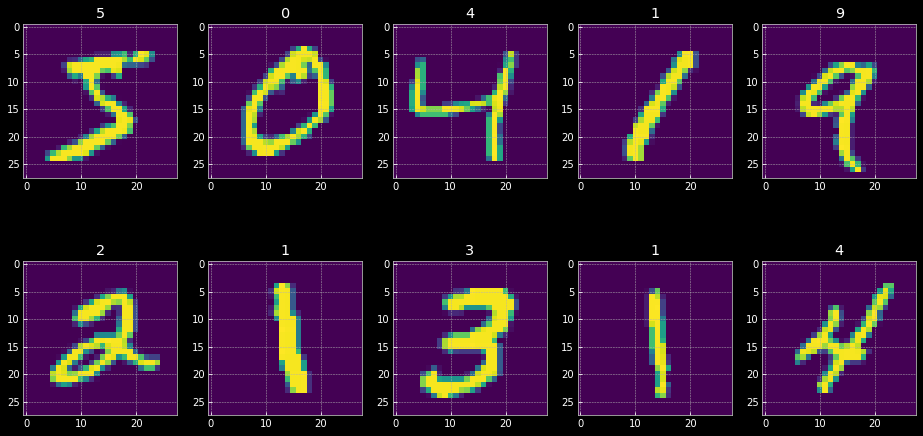

In [10]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.title(label.numpy())

# Create the model class (Design your own neural network)

In [0]:
input_size  =     784 # images are 28x28 pixels
output_size =    10  # there are 10 classes
n_hidden    =   200   # number of neurons in nth hidden layer


##### Design your model here##########


model = nn.Sequential(
        nn.Linear(784, n_hidden), 
        nn.ReLU(), 
        nn.Linear(n_hidden, n_hidden), 
        nn.ReLU(), 
        nn.Linear(n_hidden, 10)
        )

#################################

# Define Training Loop

* Loop batches of samples in the training set
* Run each batch through the model (forward pass)
* Compute the loss
* Compute the gradients with respect to model parameters (backward pass)
* Update the parameters

In [0]:
def train(epoch):
    model.train()
    #batch_idx numbers the batch
    for batch_idx, (data, target) in enumerate(train_loader):
        # Move tensors to the configured device
        data = data.reshape(-1,28*28)
        data = data.to(device)
        target = target.to(device)
        
        #############Forward pass###########
        
       
        #feedforward
      
        y = model(data) 
        #cross-entropy regression problems
        current_loss = F.cross_entropy(y, target)
        # Backward and optimize
        model.zero_grad()
        current_loss.backward()
        optimizer.step()
       

        ##########calculate the loss##########
        
        
        #######################################
        # print training loss every 100 batches
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100 * batch_idx / len(train_loader), current_loss.item()))

# Define Testing Loop

* Loop over batches of samples in the testing set
* Run each batch through the model (forward pass)
* Compute the loss and accuracy
* Do not compute gradients or update model parameters 
* We are saving the testing data to evaluate how the model is doing on data it has not been trained on

In [14]:
train(5)

NameError: ignored

In [0]:
# Test the model
def test():
    model.eval()
    test_loss = 0
    correct = 0
    
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
      for data, target in test_loader:
          # Move tensors to the configured device
          data = data.reshape(-1,28*28)
          data = data.to(device)
          target = target.to(device)
          
          #############Forward pass#############
          
          output = model(data) 

          
          
          ######################################
          test_loss += F.cross_entropy(output, target).item() # sum up batch loss  
          
          
          
          pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
          correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100 * correct / len(test_loader.dataset)))

In [56]:
test()


Test set: Average loss: 0.0003, Accuracy: 9018/10000 (90%)



# Initialize the Model and Optimizer

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Move models to the configured device
model = model.to(device)

learning_rate = 0.01

###########choose your desired optimizer##############
optimizer = optim.SGD(model.parameters(), learning_rate)



######################################################

# Train the Model

* We will only train for a few epochs here
* Normally we would train for longer
* Depending on the dataset and model size, this can take days or weeks

In [19]:
#Use a for loop to call train function and testing function
#In this way, the model can be trained and tested in few epoches
#######################################################
for t in range(5):
  train(5)
  test()


#######################################################

Train Epoch: 5 [0/60000 (0%)]	Loss: 2.091547
Train Epoch: 5 [6400/60000 (11%)]	Loss: 1.881814
Train Epoch: 5 [12800/60000 (21%)]	Loss: 1.628130
Train Epoch: 5 [19200/60000 (32%)]	Loss: 1.153546
Train Epoch: 5 [25600/60000 (43%)]	Loss: 1.017763
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.809238
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.682935
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.779739
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.675820
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.664932

Test set: Average loss: 0.0005, Accuracy: 8575/10000 (85%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.563917
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.575929
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.551031
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.343704
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.450251
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.464331
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.366029
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.264093
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.374868
T

# Now show some model predictions on testing data

* We will show an image from the testing set, and the probabilities the model assigns to each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


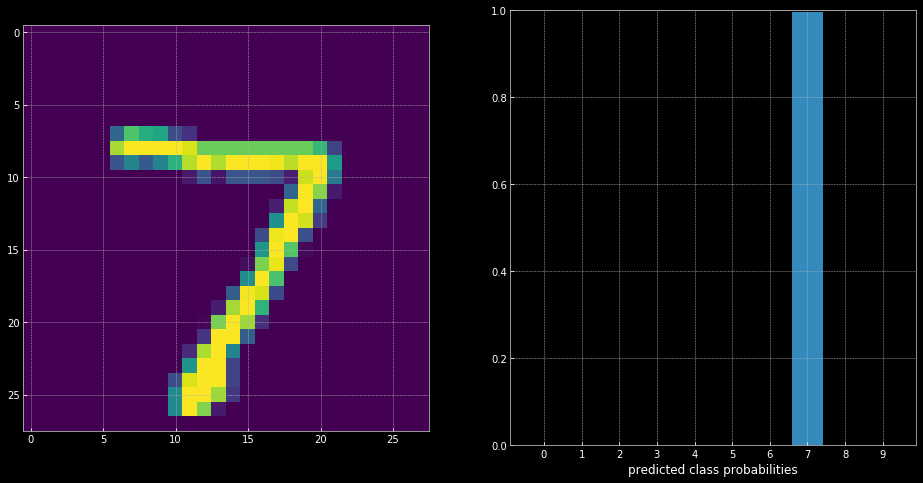

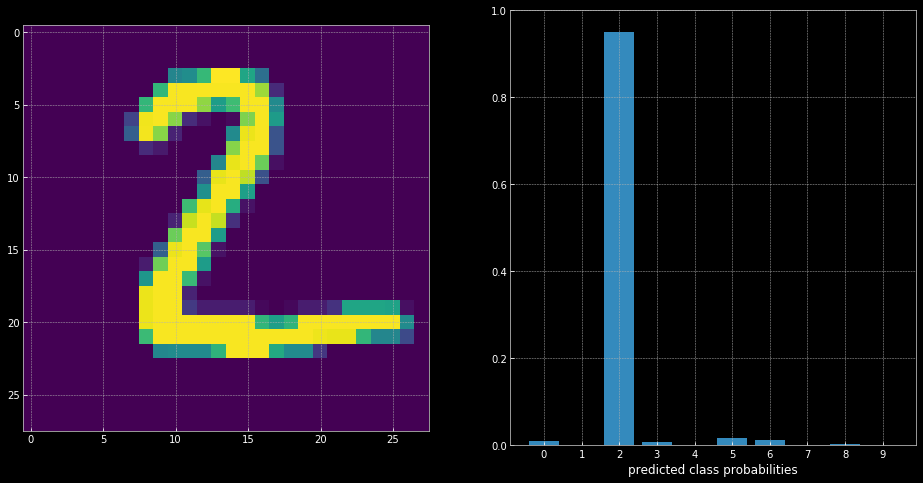

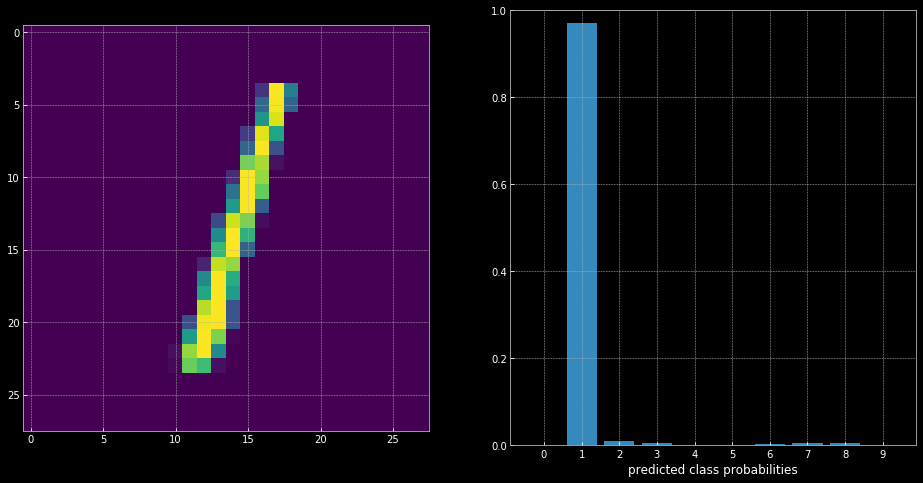

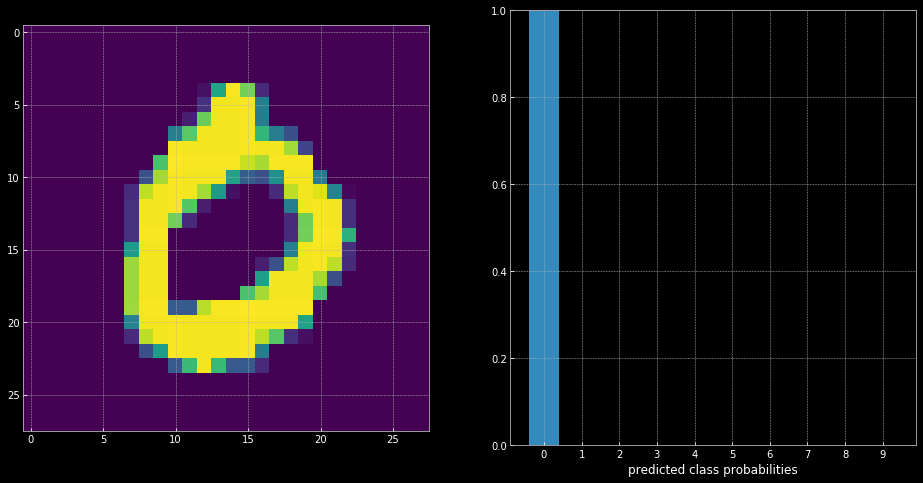

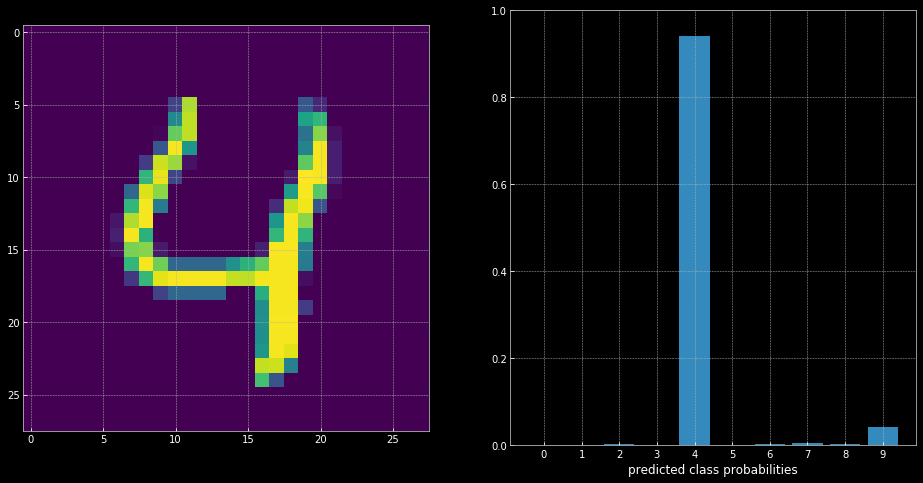

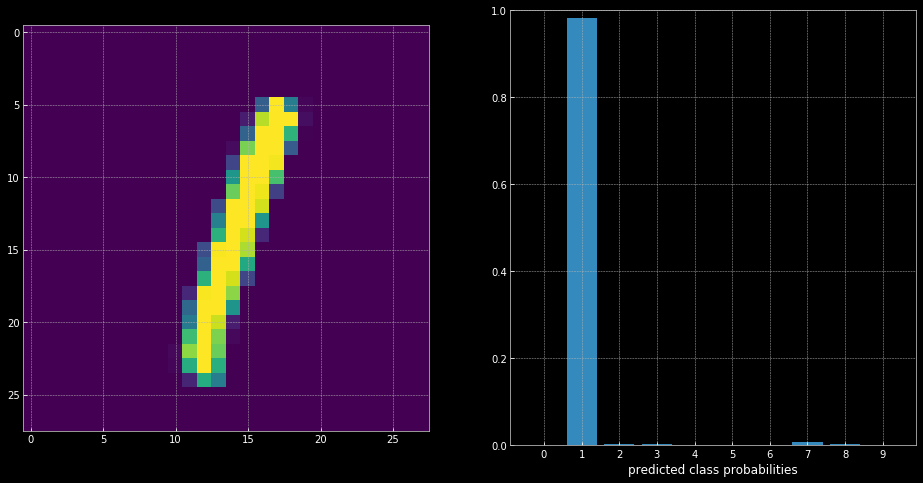

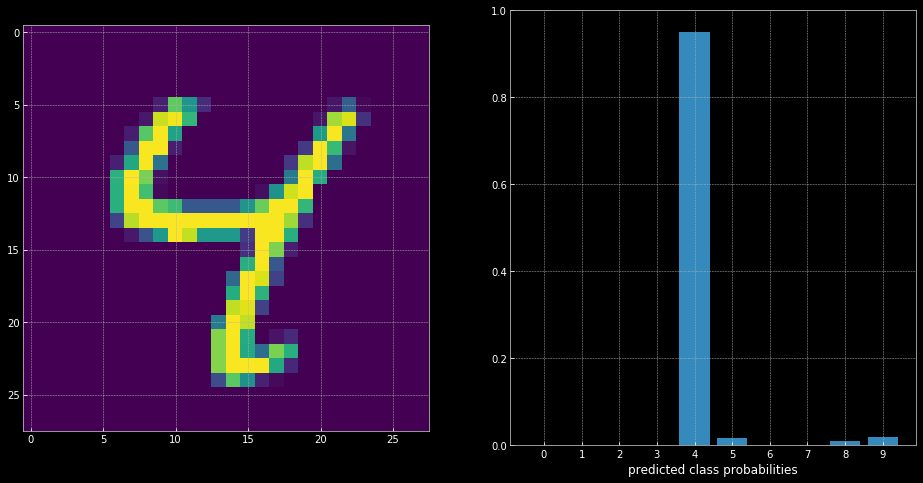

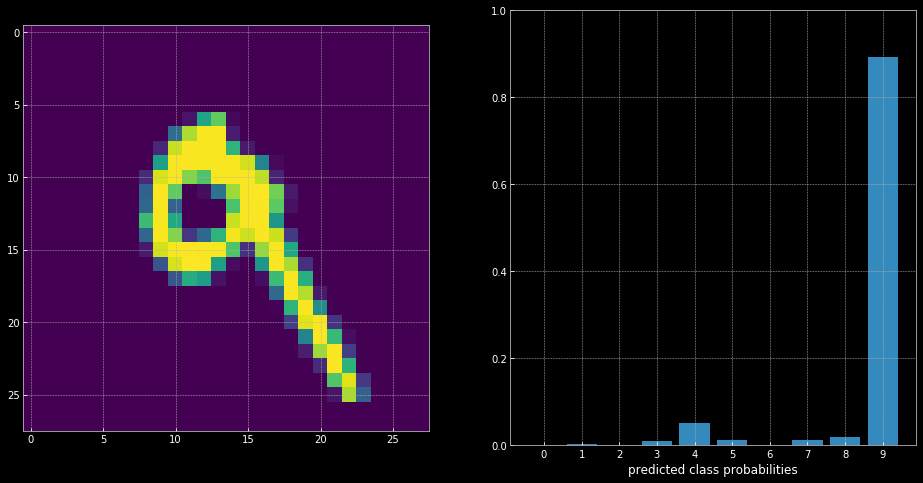

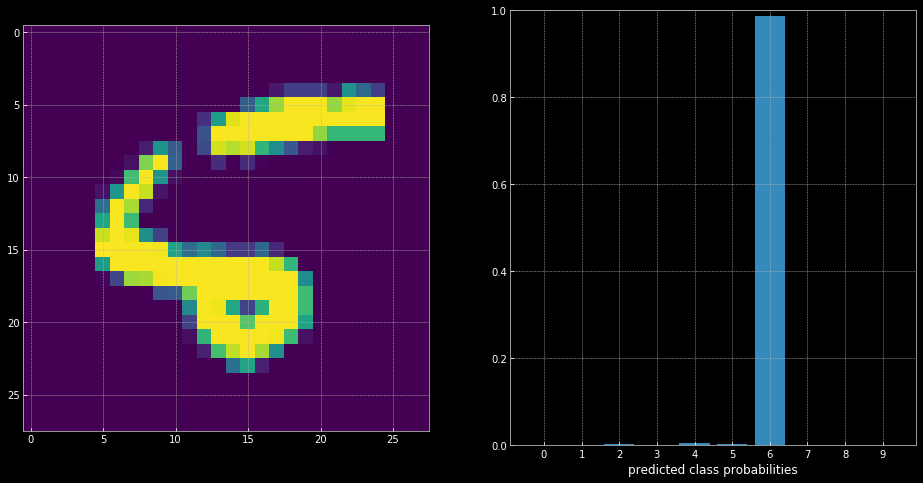

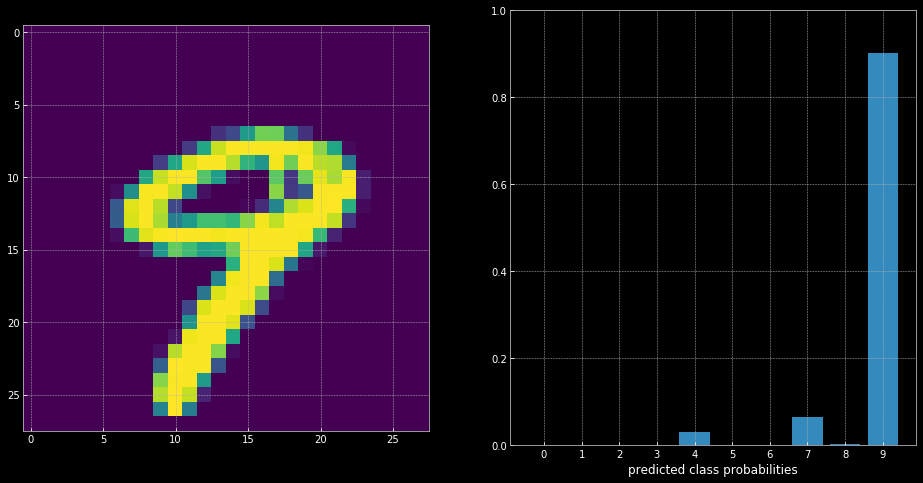

In [20]:
# show an image and the predicted probabilities                                                                                                               
def display(i):
    plt.figure(i + 1)
    image, _ = test_loader.dataset.__getitem__(i)
    output = model(image.reshape(-1,28*28))
    prob = F.softmax(output).squeeze().data
    plt.subplot(121)
    plt.imshow(image.squeeze().numpy())
    plt.subplot(122)
    plt.bar(range(10), prob.numpy())
    plt.xlabel('predicted class probabilities')
    plt.xticks(range(10))
    plt.ylim([0, 1])

for i in range(10):
    display(i)

# What happens if we use less hidden units?

In [0]:
# Training settings 
input_size  = 748     # images are 28x28 pixels
output_size = 10     # there are 10 classes
n_hidden    = 150   # number of neurons in nth hidden layer



In [0]:
#Retrain the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


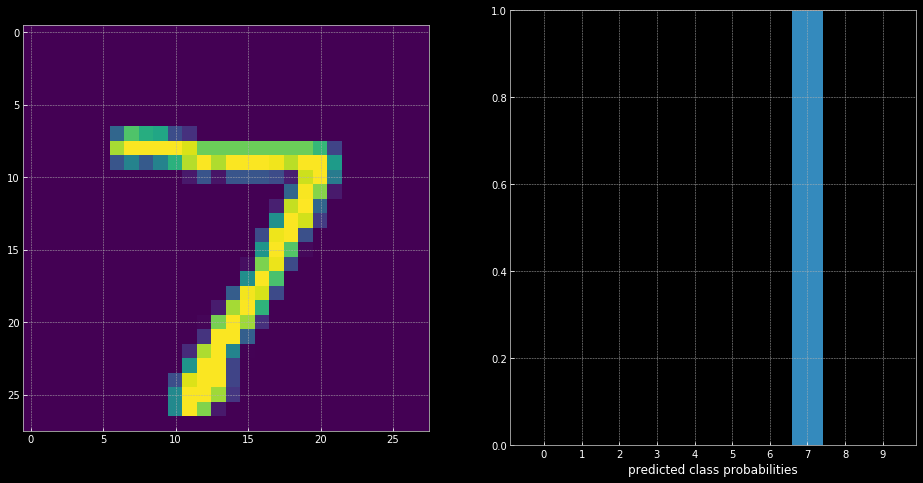

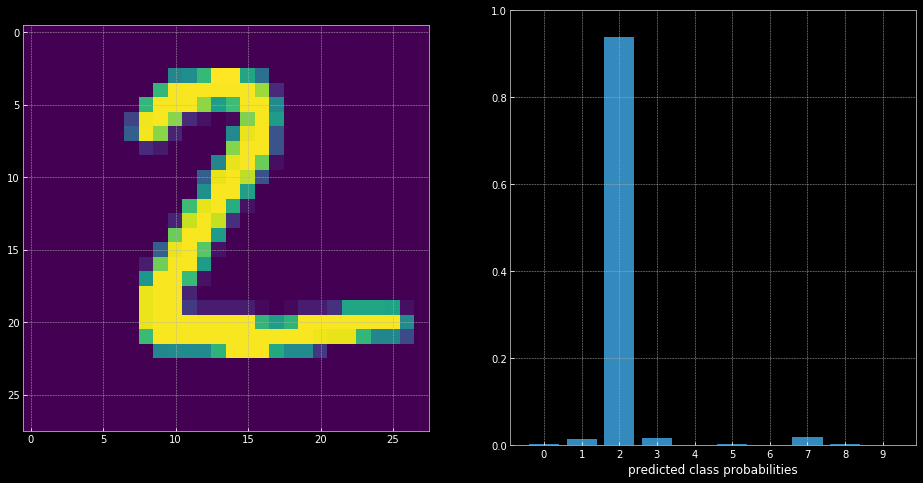

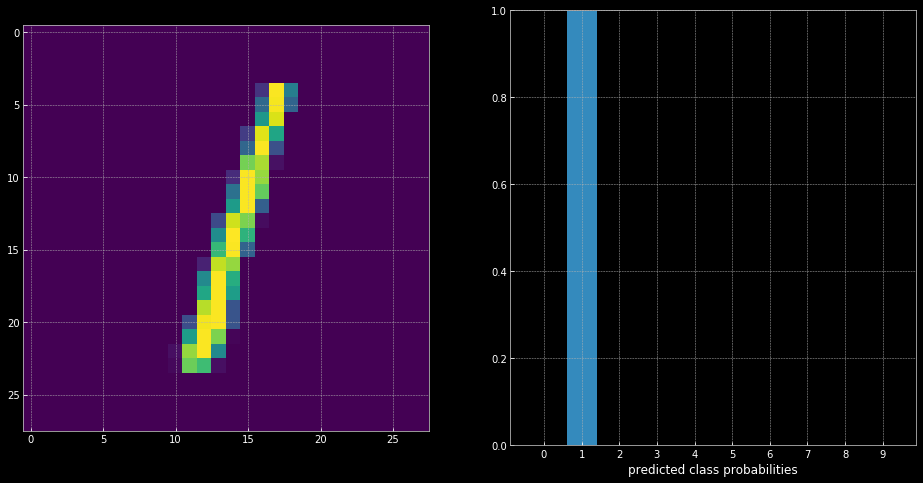

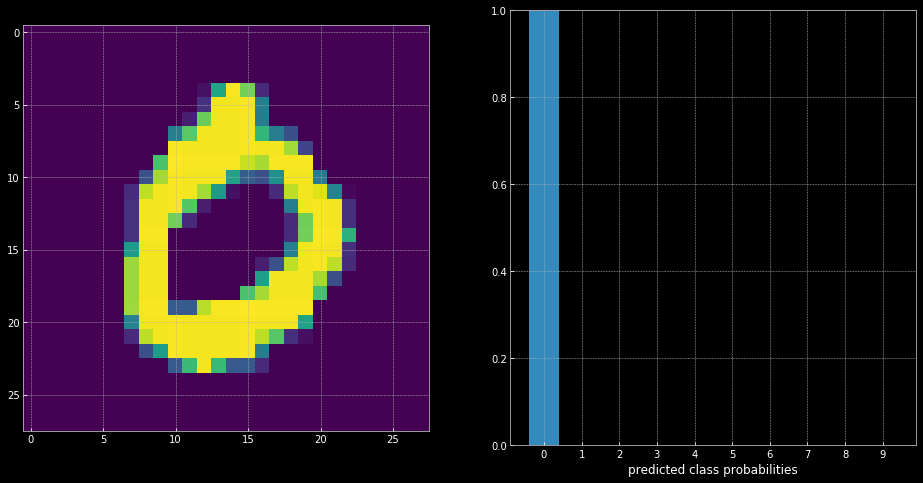

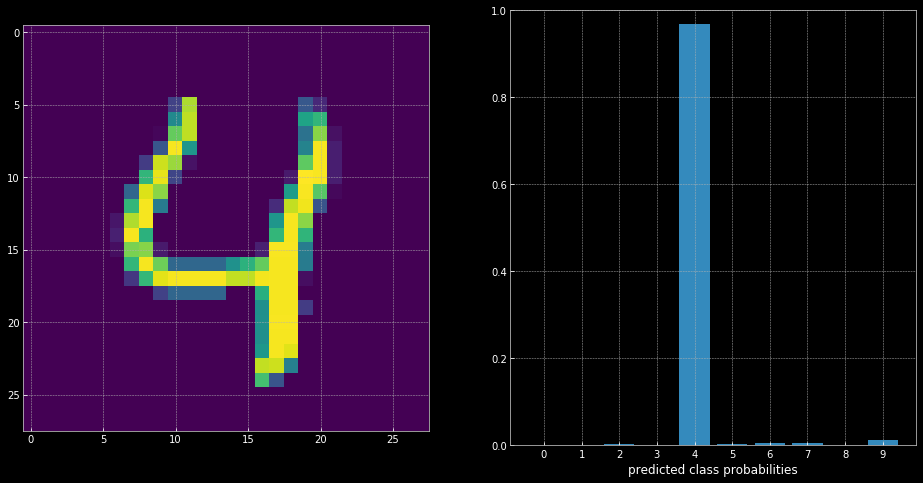

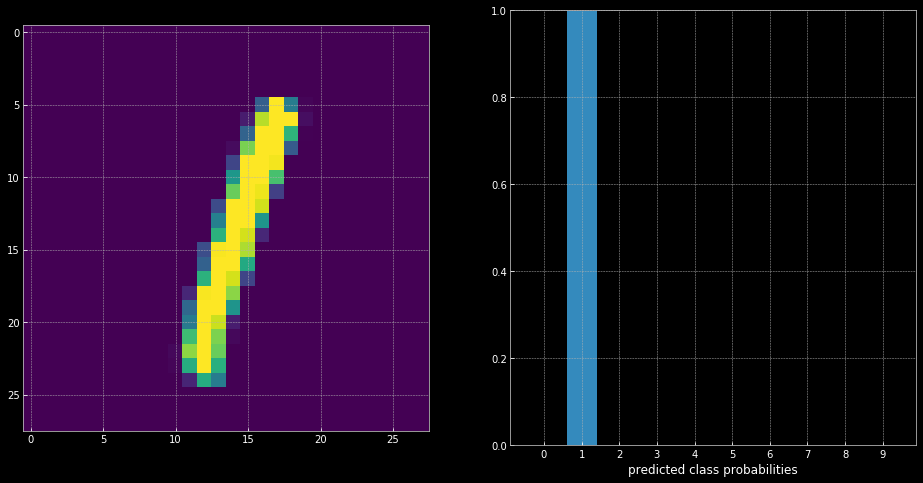

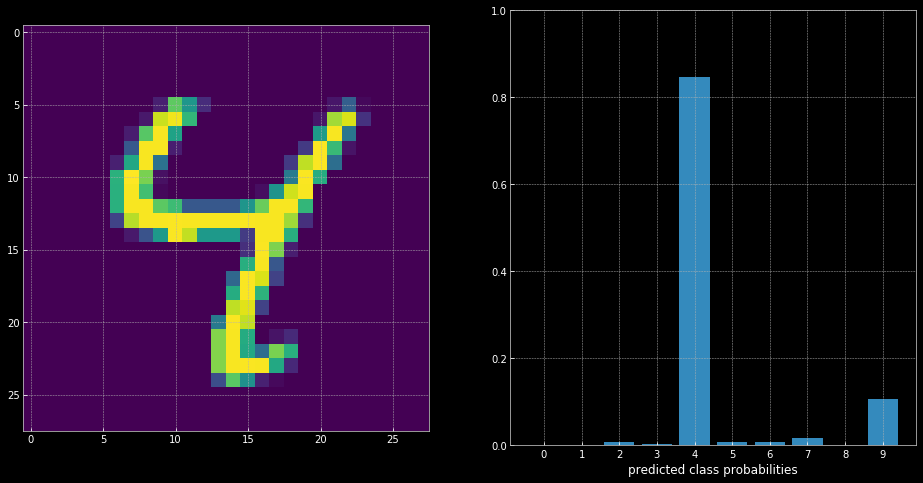

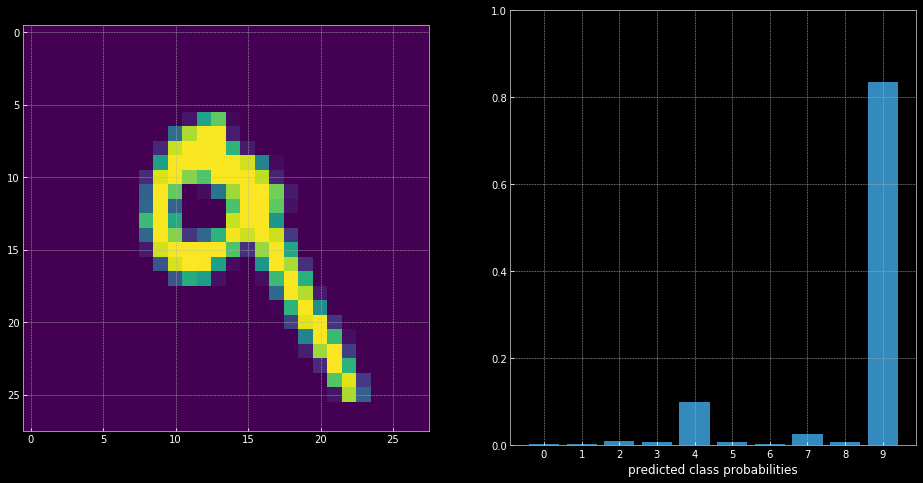

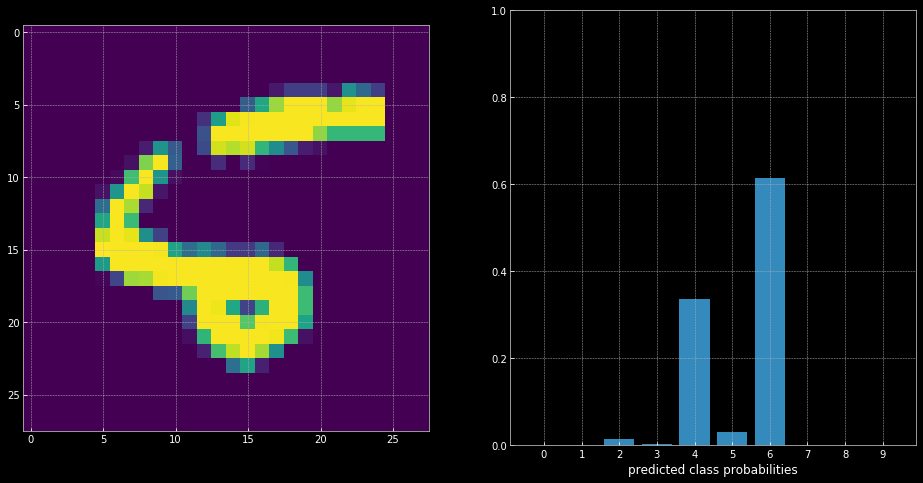

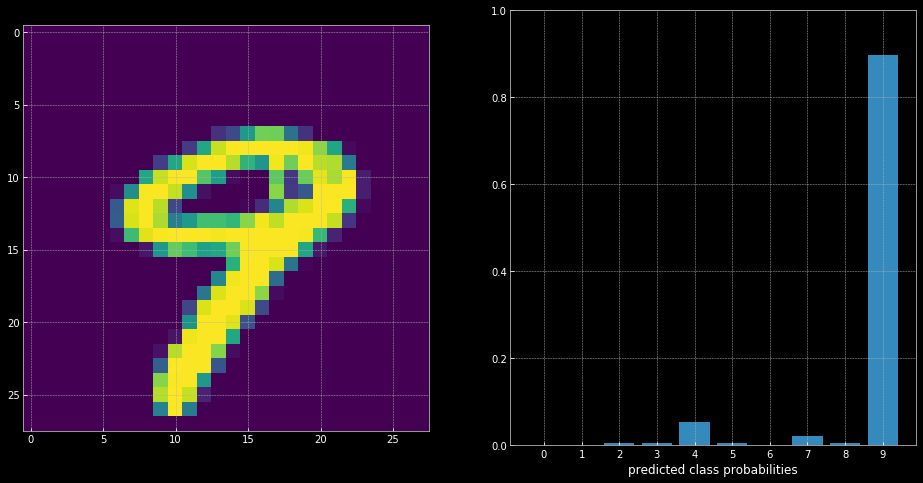

In [83]:
for i in range(10):
    display(i)

# Things to try out

* Try different numbers of layers and hidden units
* Try different non-linearities (tanh, sigmoid)
* Try on other datasets (CIFAR 10)